In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_diabetes
dataset=load_diabetes()

In [3]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target']=dataset.target

In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [6]:
X,y=dataset.data,dataset.target

In [7]:
X.shape

(442, 10)

In [8]:
from sklearn.model_selection import  train_test_split
x_test,x_train,y_test,y_train=train_test_split(X,y,random_state=10,test_size=0.3)

<Axes: >

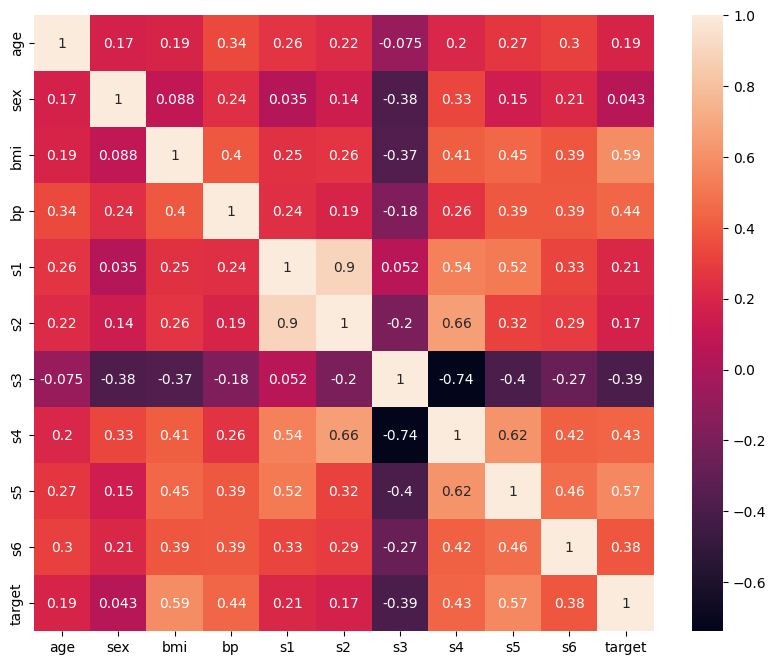

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [10]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor=DecisionTreeRegressor()
tree_regressor.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [11]:
y_hat=tree_regressor.predict(x_test)

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [13]:
mae,mse=mean_absolute_error(y_test,y_hat),mean_squared_error(y_test,y_hat)
r2=r2_score(y_test,y_hat)
print(f"MSE: {mse}\nMAE: {mae}\nR-square: {r2}")

MSE: 6344.239482200647
MAE: 62.82200647249191
R-square: -0.10191723059413205


### Hyperparmeter Tuning

In [14]:
param_grid={
   'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
   'splitter':['best', 'random'],
   'max_depth':[2,3,4,5,10,15,20,25],
   'max_features':['None','sqrt','log2']
   }

In [15]:
from sklearn.model_selection import GridSearchCV
gridCV=GridSearchCV(tree_regressor,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',verbose=3,refit=True,n_jobs=-1)

In [16]:
gridCV.fit(x_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [2, 3, ...], 'max_features': ['None', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'friedman_mse'


In [17]:
gridCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [18]:
gridCV.best_score_

np.float64(-4608.162582827363)

[Text(0.5, 0.8333333333333334, 'x[3] <= 0.095\nfriedman_mse = 6327.671\nsamples = 133\nvalue = 150.729'),
 Text(0.25, 0.5, 'x[7] <= 0.023\nfriedman_mse = 5925.923\nsamples = 127\nvalue = 145.291'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'friedman_mse = 5438.701\nsamples = 95\nvalue = 132.189'),
 Text(0.375, 0.16666666666666666, 'friedman_mse = 5349.84\nsamples = 32\nvalue = 184.188'),
 Text(0.75, 0.5, 'x[7] <= 0.014\nfriedman_mse = 956.472\nsamples = 6\nvalue = 265.833'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'friedman_mse = 721.04\nsamples = 5\nvalue = 257.4'),
 Text(0.875, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 1\nvalue = 308.0')]

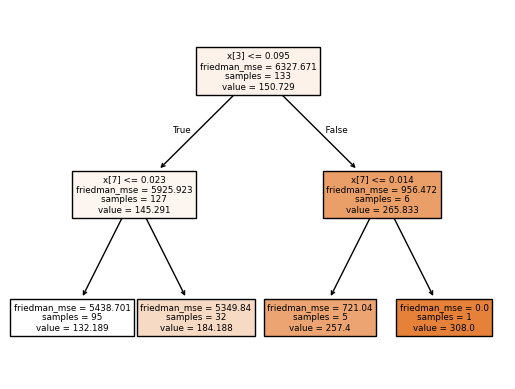

In [19]:
from sklearn import  tree
tree.plot_tree(gridCV.best_estimator_,filled=True)

In [20]:
y_hat=gridCV.predict(x_test)

In [21]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2=r2_score(y_test,y_hat)
mae=mean_absolute_error(y_test,y_hat)
mse=mean_squared_error(y_test,y_hat)
print(f"R-squared :{r2}\nMean Aboslute Error:{mae}\nMean Squared Error:{mse}")

R-squared :0.14475003904904526
Mean Aboslute Error:57.95554845852496
Mean Squared Error:4924.063639961474
